In [1]:
import pandas as pd             # This For data cleaning and operations
import matplotlib.pyplot as plt # This For graphing and visualization

In [2]:
# now load dataset
df = pd.read_csv(r"C:\Users\DELL LATITUDE 5400\Desktop\Tasks\Dataset .csv")

# Level 1 - Task 1 

In [3]:
df.head()  # It will show us top five 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape #The dataset contains 95551 rows and  21 columns

(9551, 21)

In [5]:
df.shape 

(9551, 21)

The dataset contains 95551 rows and  21 columns

In [7]:
df.isnull().sum() # chekcinh null and total nulls values 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.duplicated() # chekcing dublicates values 

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

 ### Now we are going to handling  missing values 

In [9]:
df = df.dropna(subset=["Aggregate rating"]) # Drop rows with missing target values

numeric_cols = df.select_dtypes(include="number").columns 
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

Missing values were handled using median imputation for numerical columns, and rows with missing target values were removed.

In [10]:
df.dtypes # this will shows us data types 

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [11]:
df["Country Code"] = df["Country Code"].astype("category")


Data types were reviewed and converted where necessary to ensure proper analysis.

# Target Varible Distribution

In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

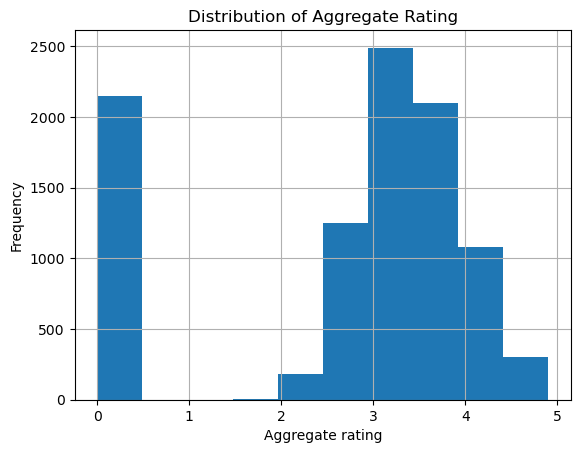

In [38]:
# Target = Aggregate rating
plt.figure()
df['Aggregate rating'].hist(bins=10)
plt.xlabel('Aggregate rating')   
plt.ylabel("Frequency")
plt.title("Distribution of Aggregate Rating")
plt.show()


A histogram was used to visualize the distribution of the target variable (Aggregate Rating). The ratings are not uniformly distributed, indicating variation in restaurant performance.

In [13]:
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

The distribution of aggregate ratings shows variation across different rating values, indicating the presence/absence of class imbalance.

In [14]:
df.to_csv("cleaned_dataset.csv", index=False) # This will save our clean filles as new  se we can see in that wifiles what we have done 

# Level 1 - Task 2

In [15]:
# sunnary statics for numercial columns 
df.describe()

,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Basic statistical measures such as mean, median, and standard deviation were calculated for all numerical variables to understand data distribution and variability.

### Explore Categorical 

In [16]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [17]:
df['Country Code'].value_counts().head(10) # this will shows us top ten counties 

Country Code
1      8652
216     434
215      80
214      60
189      60
30       60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

In [18]:
df['City'].value_counts().head(10) # This will shows top ten city

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

In [19]:
df['Cuisines'].value_counts().head(10) # This will shows top ten Cuisines

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Categorical variables such as Country Code, City, and Cuisines were analyzed using frequency counts to identify dominant categories.

In [20]:
# Top Cuisines 
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cuisines

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [21]:
# Top Cities 
top_cities =df['City'].value_counts().head(10)
top_cities

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

# Level 1 - Task 3

### Geospatial Analysis

In [23]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [24]:
# Check Latitude & Longitude columns
df[['Longitude', 'Latitude']].head()

,Longitude,Latitude
0,121.027535,14.565443
1,121.014101,14.553708
2,121.056831,14.581404
3,121.056475,14.585318
4,121.057508,14.584450


In [25]:
# checking missing values 
df[['Latitude', "Longitude"]].isnull().sum()

Latitude     0
Longitude    0
dtype: int64

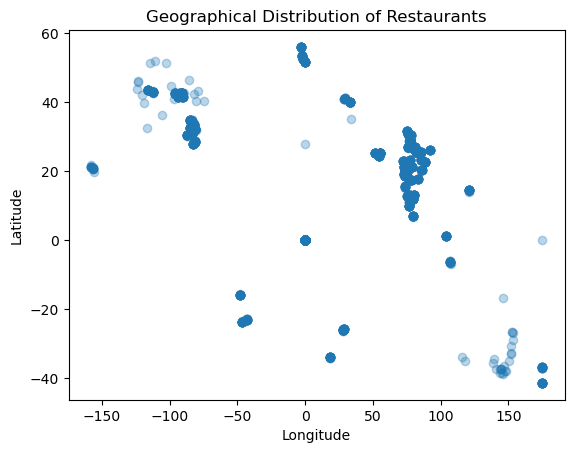

In [26]:
# Plot Restaurant Locations (Scatter Plot)

plt.figure()
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Geographical Distribution of Restaurants")
plt.show()
            

Visualize the locations of restaurants on a map using latitude and longitude information.

In [27]:
df['City'].value_counts().head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

In [28]:
df[['Latitude', 'Longitude', 'Aggregate rating']].corr()


,Latitude,Longitude,Aggregate rating
Latitude,1.000000,0.043207,0.000516
Longitude,0.043207,1.000000,-0.116818
Aggregate rating,0.000516,-0.116818,1.000000


# Level 2 - Task 1

In [29]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [30]:
# Check required columns 
df[['Has Table booking', 'Has Online delivery', 'Price range', 'Aggregate rating']].head()



,Has Table booking,Has Online delivery,Price range,Aggregate rating
0,Yes,No,3,4.8
1,Yes,No,3,4.5
2,Yes,No,4,4.4
3,No,No,4,4.9
4,Yes,No,4,4.8


In [31]:
# Table Booking 
table_booking_pct = df['Has Table booking'].value_counts(normalize=True) * 100
table_booking_pct


Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

In [32]:
# Online Delivery 
online_delivery_pct = df['Has Online delivery'].value_counts(normalize=True) * 100
online_delivery_pct


Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

In [33]:
# Average Ratings ( With vs without Table Booking)
avg_rating_table = df.groupby('Has Table booking')['Aggregate rating'].mean()
avg_rating_table

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

Restaurants offering table booking tend to have slightly higher average ratings compared to those without table booking.

In [35]:
# Online Dleivery vs Price range 
price_delivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True)*100
price_delivery

Price range  Has Online delivery
1            No                     84.225923
             Yes                    15.774077
2            No                     58.689367
             Yes                    41.310633
3            No                     70.809659
             Yes                    29.190341
4            No                     90.955631
             Yes                     9.044369
Name: proportion, dtype: float64

# Level 2 - Task 2

## Price Range Analysis

In [37]:
df['Price range'].value_counts() 

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

The price range with the highest count is the most common.

In [41]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [42]:
avg_rating_price = df.groupby('Price range')['Aggregate rating'].mean()
avg_rating_price

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

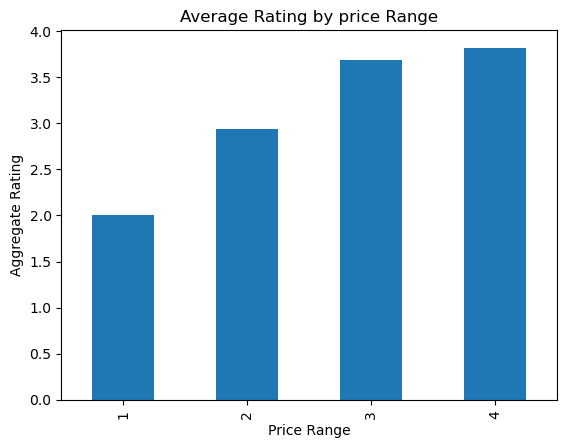

In [44]:
avg_rating_price.plot(kind='bar')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.title('Average Rating by price Range')
plt.show()

Average ratings were calculated for each price range to understand customer preferences across pricing levels.

In [45]:
color_rating = df.groupby('Rating color')['Aggregate rating'].mean()
color_rating

Rating color
Dark Green    4.659801
Green         4.168119
Orange        3.051619
Red           2.297849
White         0.000000
Yellow        3.683429
Name: Aggregate rating, dtype: float64

In [46]:
color_rating.idxmax(), color_rating.max()

('Dark Green', 4.659800664451827)

The rating color associated with the highest average rating was identified.

# Level 2 Task 3

# Feature Engineering

In [48]:
df. columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Restaurant Name Length

In [53]:
df['Restaurant_Name_Length'] = df['Restaurant Name'].str.len()
df[['Restaurant Name', 'Restaurant_Name_Length']].head()


,Restaurant Name,Restaurant_Name_Length
0,Le Petit Souffle,16
1,Izakaya Kikufuji,16
2,Heat - Edsa Shangri-La,22
3,Ooma,4
4,Sambo Kojin,11


# Address Length

In [56]:
df['Address_Length'] = df['Address'].str.len()
df[['Address', 'Address_Length']].head()


,Address,Address_Length
0,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


New features such as restaurant name length and address length were created to capture textual information numerically.

# Level  3 Task 1

## Advanced Exploratory Data Analysis & Visualisation

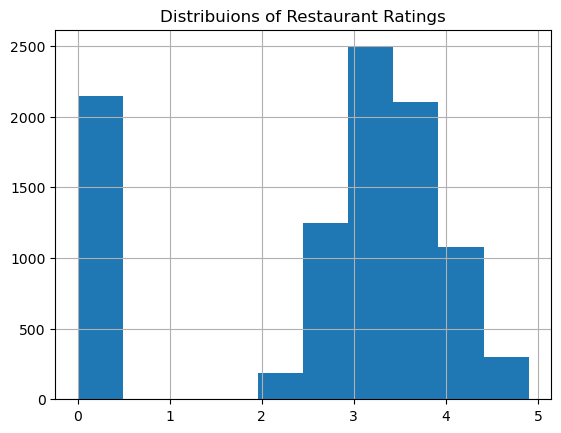

In [61]:
# How are restaurant ratings distributed?
df.columns
df['Aggregate rating'].describe()
df['Aggregate rating'].hist(bins=10)
plt.title("Distribuions of Restaurant Ratings")
plt.show()

Most restaurants fall between average rating ranges, with very few extreme values.

In [62]:
# Which cities have the highest number of restaurants?
df['City'].value_counts().head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

Restaurants are highly concentrated in a few major cities.

In [64]:
# Which cuisines are most common?
df['Cuisines'].value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

A small set of cuisines dominate the restaurant market.

# Level  3 Task 2

In [65]:
# Do higher-priced restaurants have better ratings?
df.groupby('Price range')['Aggregate rating'].mean()

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

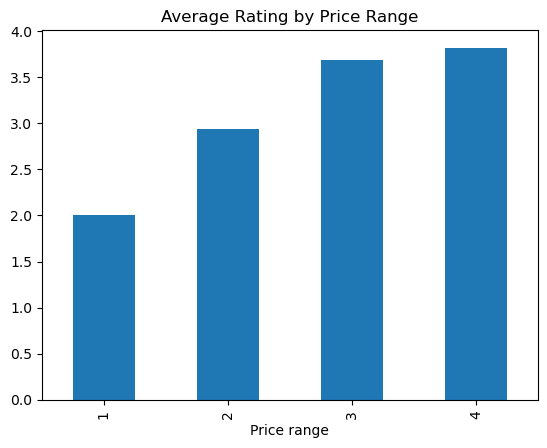

In [67]:
df.groupby('Price range')['Aggregate rating'].mean().plot(kind='bar')
plt.title("Average Rating by Price Range")
plt.show()

Higher price does not always guarantee better ratings.

In [70]:
# Does table booking affect ratings?
df.groupby('Has Table booking')['Aggregate rating'].mean()

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

Restaurants offering table booking tend to receive slightly higher ratings.

In [71]:
# Does online delivery impact customer votes?
df.groupby('Has Online delivery')['Votes'].mean()

Has Online delivery
No     138.131127
Yes    211.307222
Name: Votes, dtype: float64

In [76]:
 # Which cuisines receive the highest ratings?
df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)


Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64

Some less common cuisines receive consistently higher ratings.

# Level  3 Task 3

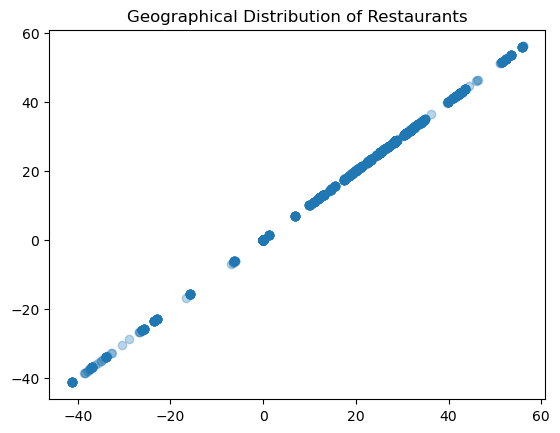

In [81]:
# Are restaurant locations clustered geographically?
plt.scatter(df['Latitude'],df['Latitude'], alpha=0.3)
plt.title("Geographical Distribution of Restaurants")
plt.show()

Restaurants are geographically clustered, indicating urban concentration.

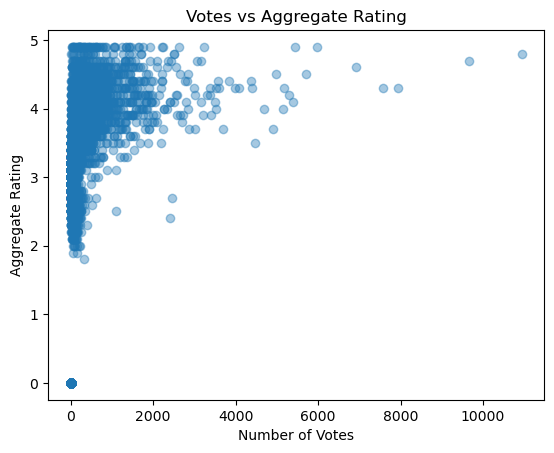

In [86]:
# Do restaurants with more votes always have higher ratings?
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.4)
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Votes vs Aggregate Rating")
plt.show()

Restaurants with higher votes do not always have higher ratings, indicating that popularity does not directly translate to better quality.

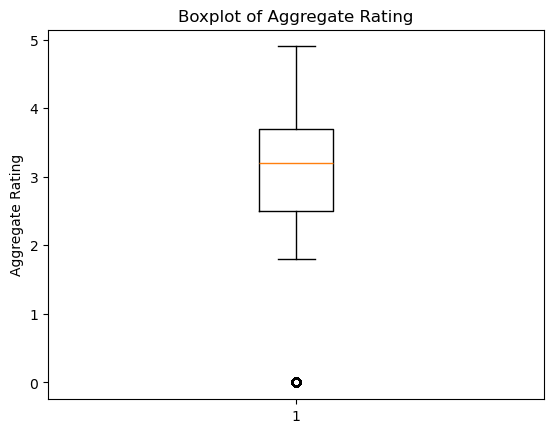

In [89]:
# Are there rating outliers in the dataset?
plt.boxplot(df['Aggregate rating'])
plt.title("Boxplot of Aggregate Rating")
plt.ylabel("Aggregate Rating")
plt.show()


The boxplot reveals the presence of a few outliers, suggesting that most restaurant ratings are concentrated within a narrow range.

In [94]:
# How do average ratings vary across top cities?
top_cities = df['City'].value_counts().head(10).index

city_rating = (
    df[df['City'].isin(top_cities)]
    .groupby('City')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

city_rating


City
Lucknow         4.195238
Guwahati        4.190476
Ahmedabad       4.161905
Bhubaneshwar    3.980952
Amritsar        3.685714
Ghaziabad       2.852000
Gurgaon         2.651431
New Delhi       2.438845
Noida           2.036204
Faridabad       1.866932
Name: Aggregate rating, dtype: float64

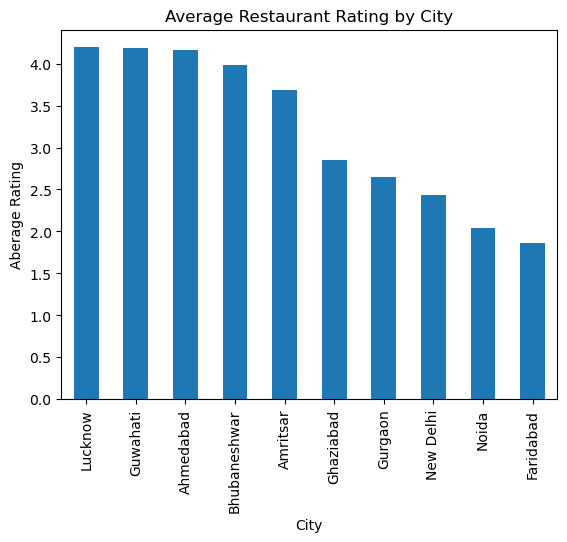

In [95]:
city_rating.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Aberage Rating")
plt.title("Average Restaurant Rating by City")
plt.show()

Average restaurant ratings vary significantly across cities, suggesting that local market dynamics and customer expectations influence ratings.